# Actian Interview Showcase:
# Andy's Data Analytics Coffee Pipeline for Category Classification ;-)
## Data Set from Kaggle:
#### https://www.kaggle.com/datasets/fatihb/coffee-quality-data-cqi?resource=download

###

In [1]:
import pandas as pd
from sqlalchemy import create_engine

# A. Data Collection

### Load the coffee data set from kaggle / github:

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/fatih-boyar/coffee-quality-data-CQI/main/df_arabica_clean.csv')

### Check the coffee data for it's content:

In [3]:
df.head()

,Unnamed: 0,ID,Country of Origin,Farm Name,Lot Number,Mill,ICO Number,Company,Altitude,Region,...,Total Cup Points,Moisture Percentage,Category One Defects,Quakers,Color,Category Two Defects,Expiration,Certification Body,Certification Address,Certification Contact
0,0,0,Colombia,Finca El Paraiso,CQU2022015,Finca El Paraiso,NaN,Coffee Quality Union,1700-1930,"Piendamo,Cauca",...,89.33,11.8,0,0,green,3,"September 21st, 2023",Japan Coffee Exchange,"〒413-0002 静岡県熱海市伊豆山１１７３−５８ 1173-58 Izusan, Ata...",松澤 宏樹 Koju Matsuzawa - +81(0)9085642901
1,1,1,Taiwan,Royal Bean Geisha Estate,"The 2022 Pacific Rim Coffee Summit,T037",Royal Bean Geisha Estate,NaN,Taiwan Coffee Laboratory,1200,Chiayi,...,87.58,10.5,0,0,blue-green,0,"November 15th, 2023",Taiwan Coffee Laboratory 台灣咖啡研究室,"QAHWAH CO., LTD 4F, No. 225, Sec. 3, Beixin Rd...","Lin, Jen-An Neil 林仁安 - 886-289116612"
2,2,2,Laos,OKLAO coffee farms,"The 2022 Pacific Rim Coffee Summit,LA01",oklao coffee processing plant,NaN,Taiwan Coffee Laboratory,1300,Laos Borofen Plateau,...,87.42,10.4,0,0,yellowish,2,"November 15th, 2023",Taiwan Coffee Laboratory 台灣咖啡研究室,"QAHWAH CO., LTD 4F, No. 225, Sec. 3, Beixin Rd...","Lin, Jen-An Neil 林仁安 - 886-289116612"
3,3,3,Costa Rica,La Cumbre,CQU2022017,La Montana Tarrazu MIll,NaN,Coffee Quality Union,1900,"Los Santos,Tarrazu",...,87.17,11.8,0,0,green,0,"September 21st, 2023",Japan Coffee Exchange,"〒413-0002 静岡県熱海市伊豆山１１７３−５８ 1173-58 Izusan, Ata...",松澤 宏樹 Koju Matsuzawa - +81(0)9085642901
4,4,4,Colombia,Finca Santuario,CQU2023002,Finca Santuario,NaN,Coffee Quality Union,1850-2100,"Popayan,Cauca",...,87.08,11.6,0,2,yellow-green,2,"March 5th, 2024",Japan Coffee Exchange,"〒413-0002 静岡県熱海市伊豆山１１７３−５８ 1173-58 Izusan, Ata...",松澤 宏樹 Koju Matsuzawa - +81(0)9085642901


### get columns:

In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             207 non-null    int64  
 1   ID                     207 non-null    int64  
 2   Country of Origin      207 non-null    object 
 3   Farm Name              205 non-null    object 
 4   Lot Number             206 non-null    object 
 5   Mill                   204 non-null    object 
 6   ICO Number             75 non-null     object 
 7   Company                207 non-null    object 
 8   Altitude               206 non-null    object 
 9   Region                 205 non-null    object 
 10  Producer               206 non-null    object 
 11  Number of Bags         207 non-null    int64  
 12  Bag Weight             207 non-null    object 
 13  In-Country Partner     207 non-null    object 
 14  Harvest Year           207 non-null    object 
 15  Gradin

### get numeric values:

In [5]:
df.describe()

,Unnamed: 0,ID,Number of Bags,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean Cup,Sweetness,Overall,Defects,Total Cup Points,Moisture Percentage,Category One Defects,Quakers,Category Two Defects
count,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.00000,207.000000,207.000000,207.000000,207.0,207.0,207.000000,207.0,207.000000,207.000000,207.000000,207.000000,207.000000
mean,103.000000,103.000000,155.449275,7.721063,7.744734,7.599758,7.69029,7.640918,7.644058,9.990338,10.0,10.0,7.676812,0.0,83.706570,10.735266,0.135266,0.690821,2.251208
std,59.899917,59.899917,244.484868,0.287626,0.279613,0.275911,0.25951,0.233499,0.256299,0.103306,0.0,0.0,0.306359,0.0,1.730417,1.247468,0.592070,1.686918,2.950183
min,0.000000,0.000000,1.000000,6.500000,6.750000,6.670000,6.83000,6.830000,6.670000,8.670000,10.0,10.0,6.670000,0.0,78.000000,0.000000,0.000000,0.000000,0.000000
25%,51.500000,51.500000,1.000000,7.580000,7.580000,7.420000,7.50000,7.500000,7.500000,10.000000,10.0,10.0,7.500000,0.0,82.580000,10.100000,0.000000,0.000000,0.000000
50%,103.000000,103.000000,14.000000,7.670000,7.750000,7.580000,7.67000,7.670000,7.670000,10.000000,10.0,10.0,7.670000,0.0,83.750000,10.800000,0.000000,0.000000,1.000000
75%,154.500000,154.500000,275.000000,7.920000,7.920000,7.750000,7.87500,7.750000,7.790000,10.000000,10.0,10.0,7.920000,0.0,84.830000,11.500000,0.000000,1.000000,3.000000
max,206.000000,206.000000,2240.000000,8.580000,8.500000,8.420000,8.58000,8.250000,8.420000,10.000000,10.0,10.0,8.580000,0.0,89.330000,13.500000,5.000000,12.000000,16.000000


### Get the numerical columns using describe() and columns


In [6]:
numerical_columns = df.describe().columns

In [7]:
numerical_columns

Index(['Unnamed: 0', 'ID', 'Number of Bags', 'Aroma', 'Flavor', 'Aftertaste',
       'Acidity', 'Body', 'Balance', 'Uniformity', 'Clean Cup', 'Sweetness',
       'Overall', 'Defects', 'Total Cup Points', 'Moisture Percentage',
       'Category One Defects', 'Quakers', 'Category Two Defects'],
      dtype='object')


### Get the text columns by inverting the numerical columns


In [8]:
text_columns = df.select_dtypes(exclude=[float, int]).columns

In [9]:
text_columns

Index(['Country of Origin', 'Farm Name', 'Lot Number', 'Mill', 'ICO Number',
       'Company', 'Altitude', 'Region', 'Producer', 'Bag Weight',
       'In-Country Partner', 'Harvest Year', 'Grading Date', 'Owner',
       'Variety', 'Status', 'Processing Method', 'Color', 'Expiration',
       'Certification Body', 'Certification Address', 'Certification Contact'],
      dtype='object')


# 
# B. Data Cleaning and Preprocessing
#

### I am using Python's Natural Language Toolkit (NLTK) to clean the collected data. ( removing punctuation, converting text to lowercase, removing stop words, and stemming)
###

In [10]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re

# Download the stopwords resource
nltk.download('stopwords')

def clean_text(text):
    if pd.notnull(text):  # Check if the value is not null
        
        # Type Conversion (type to string):
        text = str(text)  
        
        # Converting text to lowercase:
        text = text.lower()
        
        # Remove punctuation:
        text = re.sub('[^a-z]', ' ', text)
        
        # Stemming:
        text = text.split()
        ps = PorterStemmer()
        text = [ps.stem(word) for word in text if not word in set(stopwords.words('english'))]
        text = ' '.join(text)
    return text

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/thedude/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Clean the text columns based on your desired approach

In [11]:
for column in text_columns:
    df[column] = df[column].apply(clean_text)

### Check cleaned results for use in Machine Learning Classification:

In [12]:
df.head()

,Unnamed: 0,ID,Country of Origin,Farm Name,Lot Number,Mill,ICO Number,Company,Altitude,Region,...,Total Cup Points,Moisture Percentage,Category One Defects,Quakers,Color,Category Two Defects,Expiration,Certification Body,Certification Address,Certification Contact
0,0,0,colombia,finca el paraiso,cqu,finca el paraiso,NaN,coffe qualiti union,,piendamo cauca,...,89.33,11.8,0,0,green,3,septemb st,japan coffe exchang,izusan atami shizuoka japan,koju matsuzawa
1,1,1,taiwan,royal bean geisha estat,pacif rim coffe summit,royal bean geisha estat,NaN,taiwan coffe laboratori,,chiayi,...,87.58,10.5,0,0,blue green,0,novemb th,taiwan coffe laboratori,qahwah co ltd f sec beixin rd xindian dist new...,lin jen neil
2,2,2,lao,oklao coffe farm,pacif rim coffe summit la,oklao coffe process plant,NaN,taiwan coffe laboratori,,lao borofen plateau,...,87.42,10.4,0,0,yellowish,2,novemb th,taiwan coffe laboratori,qahwah co ltd f sec beixin rd xindian dist new...,lin jen neil
3,3,3,costa rica,la cumbr,cqu,la montana tarrazu mill,NaN,coffe qualiti union,,lo santo tarrazu,...,87.17,11.8,0,0,green,0,septemb st,japan coffe exchang,izusan atami shizuoka japan,koju matsuzawa
4,4,4,colombia,finca santuario,cqu,finca santuario,NaN,coffe qualiti union,,popayan cauca,...,87.08,11.6,0,2,yellow green,2,march th,japan coffe exchang,izusan atami shizuoka japan,koju matsuzawa


# Looks good, Andy! Keep going! ;-)

###
### How's the data in terms of Completeness?

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set(style="whitegrid")

In [14]:
df.isnull()

,Unnamed: 0,ID,Country of Origin,Farm Name,Lot Number,Mill,ICO Number,Company,Altitude,Region,...,Total Cup Points,Moisture Percentage,Category One Defects,Quakers,Color,Category Two Defects,Expiration,Certification Body,Certification Address,Certification Contact
0,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
203,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
204,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
205,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


### Create a heatmap for columns 21 to 40

<Axes: >

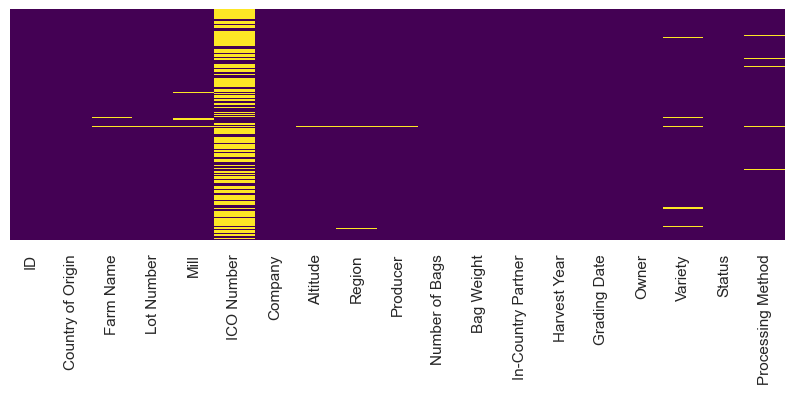

In [15]:
plt.figure(figsize=(10, 3))
sns.heatmap(df.iloc[:, 1:20].isnull(), yticklabels=False, cbar=False, cmap='viridis')

### Create a heatmap for columns 21 to 40

<Axes: >

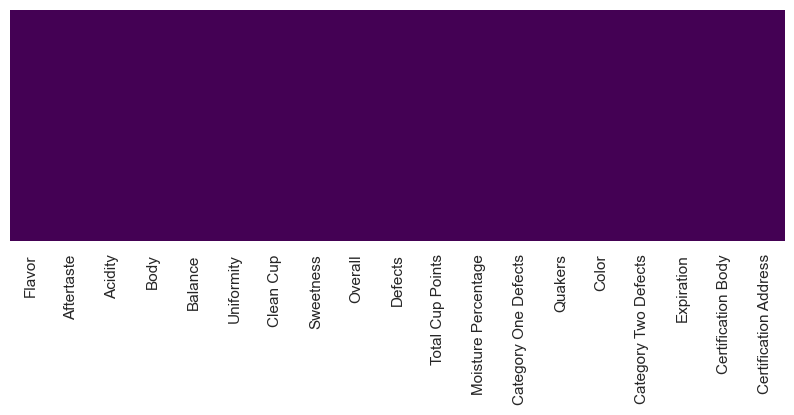

In [16]:
plt.figure(figsize=(10, 3))
sns.heatmap(df.iloc[:, 21:40].isnull(), yticklabels=False, cbar=False, cmap='viridis')

### Identify columns with missing values

In [17]:

columns_with_missing_values = df.columns[df.isnull().any()].tolist()


### Create a heatmap for columns with missing values

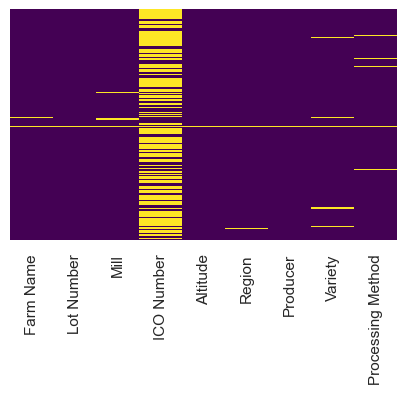

In [18]:

plt.figure(figsize=(5, 3))
sns.heatmap(df[columns_with_missing_values].isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.show()

In [19]:
df.drop('ICO Number', axis=1, inplace=True)

### reload list of missing values:

In [20]:
columns_with_missing_values = df.columns[df.isnull().any()].tolist()

<Axes: >

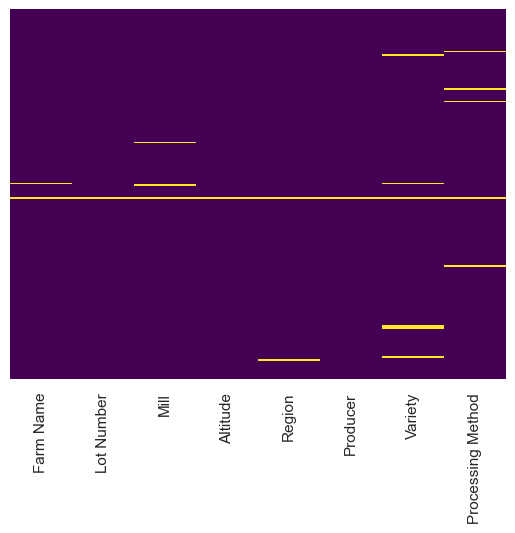

In [21]:
sns.heatmap(df[columns_with_missing_values].isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [22]:
df[columns_with_missing_values].head(4)

,Farm Name,Lot Number,Mill,Altitude,Region,Producer,Variety,Processing Method
0,finca el paraiso,cqu,finca el paraiso,,piendamo cauca,diego samuel bermudez,castillo,doubl anaerob wash
1,royal bean geisha estat,pacif rim coffe summit,royal bean geisha estat,,chiayi,,gesha,wash wet
2,oklao coffe farm,pacif rim coffe summit la,oklao coffe process plant,,lao borofen plateau,wu tao chi,java,semi wash
3,la cumbr,cqu,la montana tarrazu mill,,lo santo tarrazu,santa maria de dota,gesha,wash wet


## Let's fill, the missing values by imputation:

### for numeric I'll use mean() and for categorical I'll use just "unknown"

In [23]:
def impute_missing_values(df):
    for column in df.columns:
        if df[column].dtype == 'object':  # if the column is categorical
            df[column].fillna('unknown', inplace=True)
        else:  # if the column is numerical
            df[column].fillna(df[column].mean(), inplace=True)
    return df

### test the function with a copy:

In [24]:
df_imputed = impute_missing_values(df.copy())
columns_with_missing_values = df.columns[df_imputed.isnull().any()].tolist()
print("columns with missing values count = {}".format(len(columns_with_missing_values)))

columns with missing values count = 0


### Apple the function to df:

In [25]:
 impute_missing_values(df)

,Unnamed: 0,ID,Country of Origin,Farm Name,Lot Number,Mill,Company,Altitude,Region,Producer,...,Total Cup Points,Moisture Percentage,Category One Defects,Quakers,Color,Category Two Defects,Expiration,Certification Body,Certification Address,Certification Contact
0,0,0,colombia,finca el paraiso,cqu,finca el paraiso,coffe qualiti union,,piendamo cauca,diego samuel bermudez,...,89.33,11.8,0,0,green,3,septemb st,japan coffe exchang,izusan atami shizuoka japan,koju matsuzawa
1,1,1,taiwan,royal bean geisha estat,pacif rim coffe summit,royal bean geisha estat,taiwan coffe laboratori,,chiayi,,...,87.58,10.5,0,0,blue green,0,novemb th,taiwan coffe laboratori,qahwah co ltd f sec beixin rd xindian dist new...,lin jen neil
2,2,2,lao,oklao coffe farm,pacif rim coffe summit la,oklao coffe process plant,taiwan coffe laboratori,,lao borofen plateau,wu tao chi,...,87.42,10.4,0,0,yellowish,2,novemb th,taiwan coffe laboratori,qahwah co ltd f sec beixin rd xindian dist new...,lin jen neil
3,3,3,costa rica,la cumbr,cqu,la montana tarrazu mill,coffe qualiti union,,lo santo tarrazu,santa maria de dota,...,87.17,11.8,0,0,green,0,septemb st,japan coffe exchang,izusan atami shizuoka japan,koju matsuzawa
4,4,4,colombia,finca santuario,cqu,finca santuario,coffe qualiti union,,popayan cauca,camilo merizald,...,87.08,11.6,0,2,yellow green,2,march th,japan coffe exchang,izusan atami shizuoka japan,koju matsuzawa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,202,202,brazil,fazenda conquista,,dri mill,ipanema coffe,,sul de mina,ipanema coffe,...,80.08,11.4,0,0,green,4,februari nd,brazil specialti coffe associ,rua gaspar batista paiva santa luiza varginha ...,chri allen
203,203,203,nicaragua,finca san felip,,beneficio atlant baco,exportadora atlant,,matagalpa,exportadora atlant,...,80.00,10.4,0,2,green,12,march nd,asociaci n de caf especial de nicaragua,del hotel seminol c al lago c arriba,maria ine benavidez toval
204,204,204,lao,,vl,dri mill,marubeni corpor,,bolaven plateau,lao minh tien coffe sole co ltd,...,79.67,11.6,0,9,green,11,novemb th,japan coffe exchang,izusan atami shizuoka japan,koju matsuzawa
205,205,205,el salvador,rosario de maria ii area de la pila,,optimum coffe san salvador el salvador,aprentium enterpris llc,,volcan de san vicent la paz el salvador,roselia yglesia,...,78.08,11.0,0,12,bluish green,13,march th,salvadoran coffe council,final av nort call pte dentro de la instalacio...,toma bonilla


In [26]:
columns_with_missing_values = df.columns[df_imputed.isnull().any()].tolist()
print("columns with missing values count = {}".format(len(columns_with_missing_values)))

columns with missing values count = 0


### the resulting plot:

<Axes: >

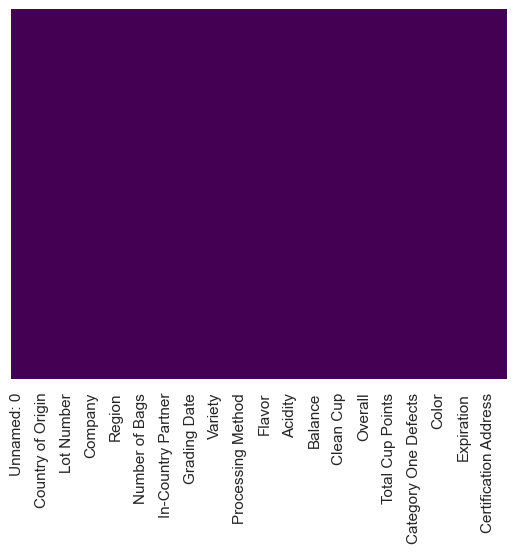

In [27]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

## No missing values.
***

### I'll just drop the rest of the unneccessary columns:

In [28]:
columns_list = df.columns.to_list()

In [29]:
columns_list

['Unnamed: 0',
 'ID',
 'Country of Origin',
 'Farm Name',
 'Lot Number',
 'Mill',
 'Company',
 'Altitude',
 'Region',
 'Producer',
 'Number of Bags',
 'Bag Weight',
 'In-Country Partner',
 'Harvest Year',
 'Grading Date',
 'Owner',
 'Variety',
 'Status',
 'Processing Method',
 'Aroma',
 'Flavor',
 'Aftertaste',
 'Acidity',
 'Body',
 'Balance',
 'Uniformity',
 'Clean Cup',
 'Sweetness',
 'Overall',
 'Defects',
 'Total Cup Points',
 'Moisture Percentage',
 'Category One Defects',
 'Quakers',
 'Color',
 'Category Two Defects',
 'Expiration',
 'Certification Body',
 'Certification Address',
 'Certification Contact']

### Define the items to be removed

In [30]:

items_to_remove = ['Unnamed: 0', 'ID', 'Lot Number', 'Bag Weight', 'In-Country Partner','Owner', 'Variety','Status','Certification Body', 'Certification Address', 'Certification Contact']




### Remove the items from the list

In [31]:

for item in items_to_remove:
    columns_list.remove(item)

In [32]:
columns_list

['Country of Origin',
 'Farm Name',
 'Mill',
 'Company',
 'Altitude',
 'Region',
 'Producer',
 'Number of Bags',
 'Harvest Year',
 'Grading Date',
 'Processing Method',
 'Aroma',
 'Flavor',
 'Aftertaste',
 'Acidity',
 'Body',
 'Balance',
 'Uniformity',
 'Clean Cup',
 'Sweetness',
 'Overall',
 'Defects',
 'Total Cup Points',
 'Moisture Percentage',
 'Category One Defects',
 'Quakers',
 'Color',
 'Category Two Defects',
 'Expiration']

In [33]:
columns_list.remove('Company')

In [34]:
items_to_remove

['Unnamed: 0',
 'ID',
 'Lot Number',
 'Bag Weight',
 'In-Country Partner',
 'Owner',
 'Variety',
 'Status',
 'Certification Body',
 'Certification Address',
 'Certification Contact']

In [35]:
df = df.drop(items_to_remove, axis=1)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Country of Origin     207 non-null    object 
 1   Farm Name             207 non-null    object 
 2   Mill                  207 non-null    object 
 3   Company               207 non-null    object 
 4   Altitude              207 non-null    object 
 5   Region                207 non-null    object 
 6   Producer              207 non-null    object 
 7   Number of Bags        207 non-null    int64  
 8   Harvest Year          207 non-null    object 
 9   Grading Date          207 non-null    object 
 10  Processing Method     207 non-null    object 
 11  Aroma                 207 non-null    float64
 12  Flavor                207 non-null    float64
 13  Aftertaste            207 non-null    float64
 14  Acidity               207 non-null    float64
 15  Body                  2

In [37]:
df = df.drop('Company', axis=1)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Country of Origin     207 non-null    object 
 1   Farm Name             207 non-null    object 
 2   Mill                  207 non-null    object 
 3   Altitude              207 non-null    object 
 4   Region                207 non-null    object 
 5   Producer              207 non-null    object 
 6   Number of Bags        207 non-null    int64  
 7   Harvest Year          207 non-null    object 
 8   Grading Date          207 non-null    object 
 9   Processing Method     207 non-null    object 
 10  Aroma                 207 non-null    float64
 11  Flavor                207 non-null    float64
 12  Aftertaste            207 non-null    float64
 13  Acidity               207 non-null    float64
 14  Body                  207 non-null    float64
 15  Balance               2

In [39]:
# import cufflinks as cf
# df.iplot(kind='bar', x='Number of Bags', y='Flavor', title='Number of Bags vs Flavor', xTitle='Number of Bags', yTitle='Flavor')


<Axes: xlabel='Flavor', ylabel='Number of Bags'>

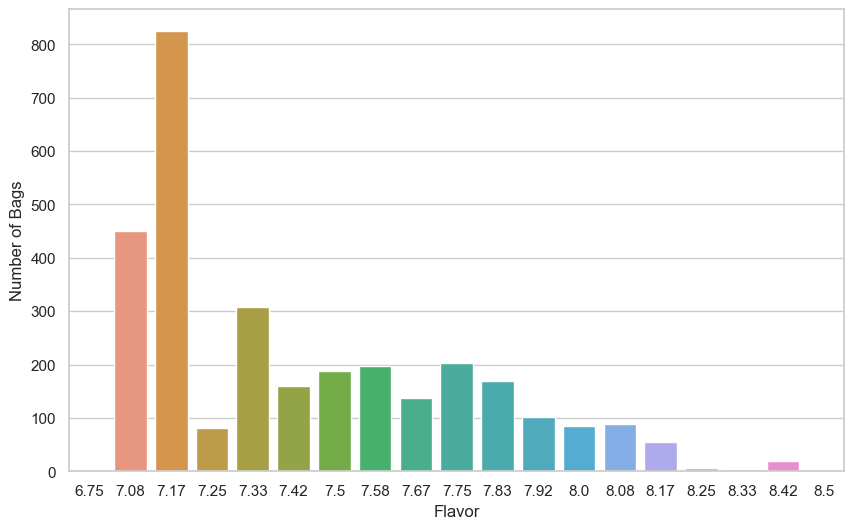

In [42]:
fig, ax = plt.subplots(figsize=(10, 6))

sns.barplot(y='Number of Bags', x='Flavor', data=df, ax=ax, errorbar=None)


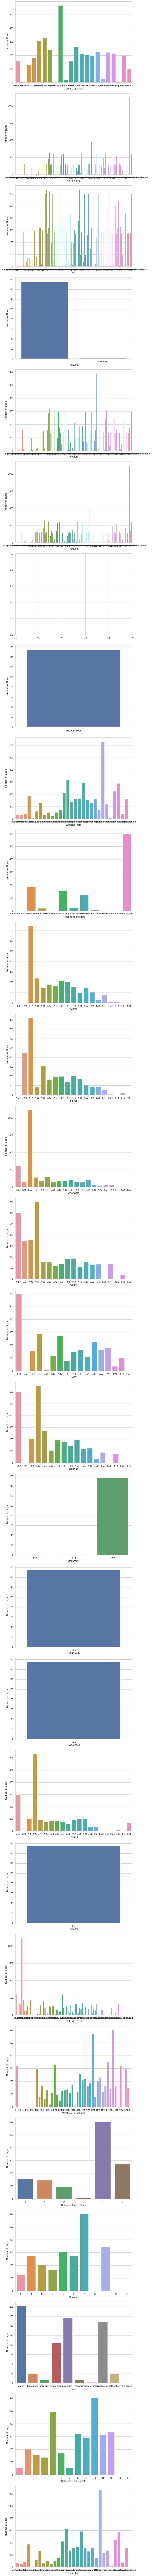

In [49]:
fig, axs = plt.subplots(len(columns_list), figsize=(10, 6 * len(columns_list)))

# Create a bar plot for each column
for ax, column in zip(axs, columns_list):
    if column != 'Number of Bags':
        sns.barplot(x=column, y='Number of Bags', data=df, ax=ax, errorbar=None)

# Show the plots
plt.tight_layout()
plt.show()

In [53]:
no_correlation_list = ['Altitude', 'Harvest Year', 'Uniformity', 'Clean Cup', 'Sweetness', 'Defects']

In [54]:
df = df.drop(no_correlation_list, axis=1)

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Country of Origin     207 non-null    object 
 1   Farm Name             207 non-null    object 
 2   Mill                  207 non-null    object 
 3   Region                207 non-null    object 
 4   Producer              207 non-null    object 
 5   Number of Bags        207 non-null    int64  
 6   Grading Date          207 non-null    object 
 7   Processing Method     207 non-null    object 
 8   Aroma                 207 non-null    float64
 9   Flavor                207 non-null    float64
 10  Aftertaste            207 non-null    float64
 11  Acidity               207 non-null    float64
 12  Body                  207 non-null    float64
 13  Balance               207 non-null    float64
 14  Overall               207 non-null    float64
 15  Total Cup Points      2

In [72]:
columns_list = df.columns.to_list()

# Remove 'Number of Bags' from columns_list
columns_list.remove('Number of Bags')

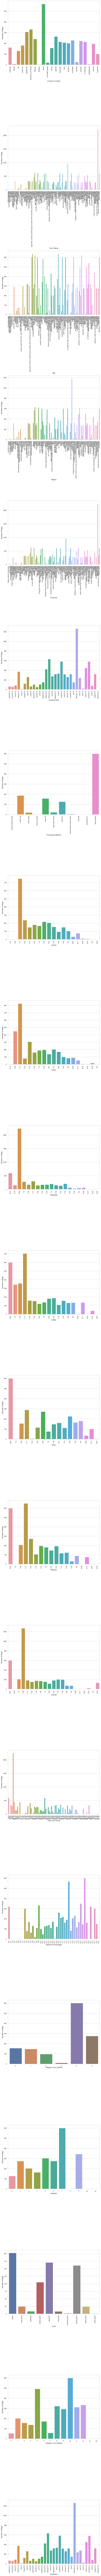

In [74]:
#import matplotlib.ticker as ticker

fig, axs = plt.subplots(len(columns_list), figsize=(10, 12 * len(columns_list)))

# Create a bar plot for each column
for ax, column in zip(axs, columns_list):
    sns.barplot(x=column, y='Number of Bags', data=df, ax=ax, errorbar=None)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)  # Rotate x-axis labels
    #ax.xaxis.set_major_locator(ticker.MaxNLocator(20)) # Set x-axis to only display 20 labels


# Show the plots
plt.tight_layout()
plt.show()

## Awesome! great job, Andy! the boring part is done, now let's rock'n'roll! ;-)

***

### Before we go ahead and create the ML-dataset we have to define our prediction-target, which will be the number of bags.

### Let's check out the 'Number of Bags' in relation to the Farms.
***

### First things first, I'll create a histogram for 'Number of Bags' in the DataFrame

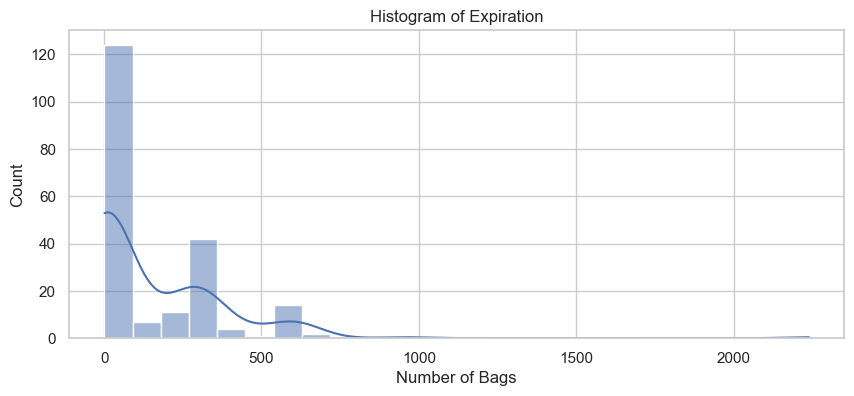

In [75]:
plt.figure(figsize=(10, 4))
sns.histplot(data=df, x='Number of Bags', kde=True)
plt.title(f'Histogram of {column}')
plt.show()

### Group the data by 'Farm Name' and sum the 'Number of Bags'

#### Which is for SQL: 
***
SELECT "Farm Name", SUM("Number of Bags") AS "Number of Bags"  
FROM Farm  
GROUP BY "Farm Name"  
ORDER BY SUM("Number of Bags") DESC  
LIMIT 10;
***

In [76]:
grouped_data = df.groupby('Farm Name')['Number of Bags'].sum().reset_index()

In [77]:
grouped_data.head(4)

,Farm Name,Number of Bags
0,,775
1,agricultur product market group hualien shlin ...,1
2,agua calient,1475
3,ama el aroma micro lot sunris,10


### Create a bar plot

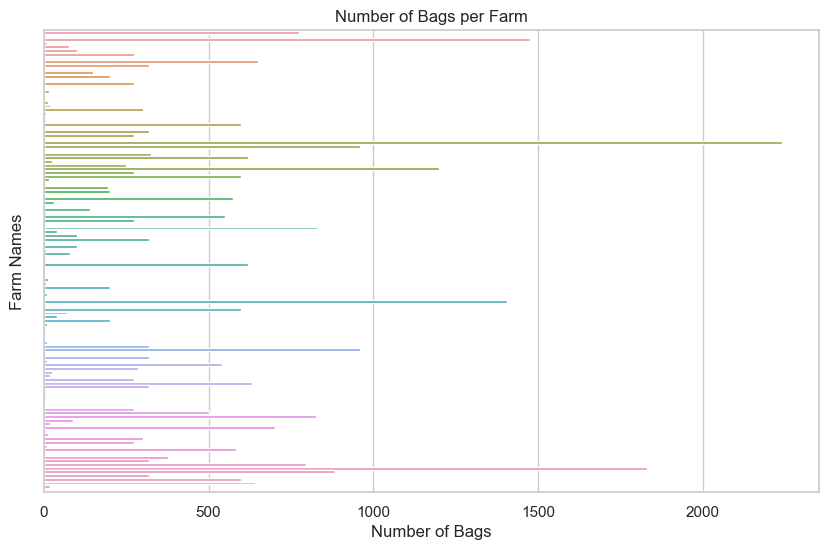

In [78]:
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x='Number of Bags', y='Farm Name', data=grouped_data)
barplot.set_yticklabels([])
plt.title('Number of Bags per Farm')
plt.xlabel('Number of Bags')
plt.ylabel('Farm Names')
plt.show()

### Get the 10 largest farms by 'Number of Bags'

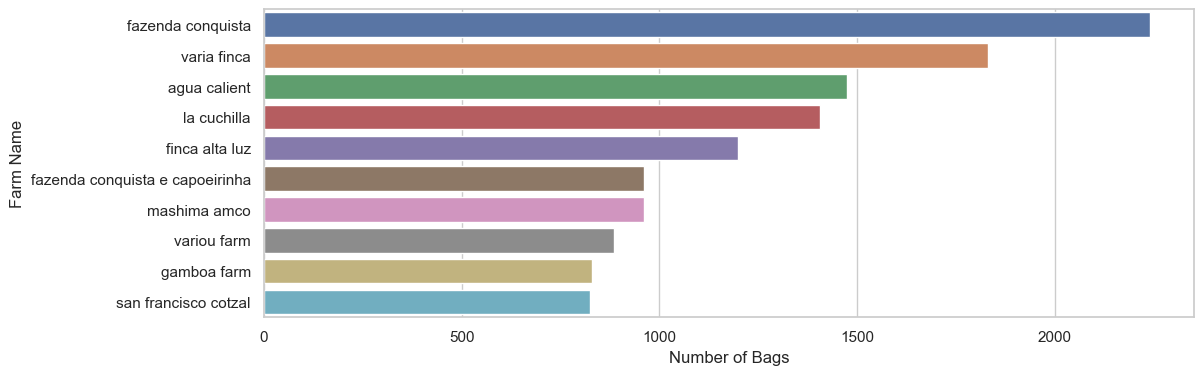

In [79]:
top_10_farms = grouped_data.nlargest(10, 'Number of Bags')

plt.figure(figsize=(12, 4))
barplot = sns.barplot(x='Number of Bags', y='Farm Name', data=top_10_farms)


In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Country of Origin     207 non-null    object 
 1   Farm Name             207 non-null    object 
 2   Mill                  207 non-null    object 
 3   Region                207 non-null    object 
 4   Producer              207 non-null    object 
 5   Number of Bags        207 non-null    int64  
 6   Grading Date          207 non-null    object 
 7   Processing Method     207 non-null    object 
 8   Aroma                 207 non-null    float64
 9   Flavor                207 non-null    float64
 10  Aftertaste            207 non-null    float64
 11  Acidity               207 non-null    float64
 12  Body                  207 non-null    float64
 13  Balance               207 non-null    float64
 14  Overall               207 non-null    float64
 15  Total Cup Points      2

### we could OneHotEncode the object-types, but for the testcase let's just drop the the object-types

In [118]:
df = df.drop(['Country of Origin', 'Farm Name', 'Mill', 'Region', 'Producer', 'Grading Date', 'Processing Method', 'Color', 'Expiration'], axis=1)

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Number of Bags        207 non-null    int64  
 1   Aroma                 207 non-null    float64
 2   Flavor                207 non-null    float64
 3   Aftertaste            207 non-null    float64
 4   Acidity               207 non-null    float64
 5   Body                  207 non-null    float64
 6   Balance               207 non-null    float64
 7   Overall               207 non-null    float64
 8   Total Cup Points      207 non-null    float64
 9   Moisture Percentage   207 non-null    float64
 10  Category One Defects  207 non-null    int64  
 11  Quakers               207 non-null    int64  
 12  Category Two Defects  207 non-null    int64  
dtypes: float64(9), int64(4)
memory usage: 21.1 KB


### Now is the time - Let's create the ML data sets:

In [181]:
from sklearn.model_selection import train_test_split

### Define your target variable to predict, which is the 'Number of Bags' and split the DataFrame into features (X) and target (y):

In [182]:
target = 'Number of Bags'
X = df.drop(target, axis=1)
y = df[target]

# 4. Feature Extraction

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features = 1500)
X = cv.fit_transform(corpus).toarray()

# 5. Labelling

# 6. Model Training

### With scikit-learn I split the data into training set and test set:

In [302]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [303]:
y

0         1
1         1
2        19
3         1
4         2
       ... 
202    2240
203     300
204     343
205       1
206     600
Name: Number of Bags, Length: 207, dtype: int64

In [304]:
X.head(2)

,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Overall,Total Cup Points,Moisture Percentage,Category One Defects,Quakers,Category Two Defects
0,8.58,8.5,8.42,8.58,8.25,8.42,8.58,89.33,11.8,0,0,3
1,8.50,8.5,7.92,8.00,7.92,8.25,8.50,87.58,10.5,0,0,0


In [305]:
X_train.shape

(165, 12)

In [306]:
y_train.shape

(165,)

In [307]:
X_test.shape

(42, 12)

In [308]:
y_test.shape

(42,)

In [217]:
from sklearn.linear_model import LogisticRegression

In [218]:
logmodel = LogisticRegression()

### let's create the categorical mapping with get_dummies() on the training dataset:

In [279]:
X_train_encoded = pd.get_dummies(X_train)
X_test_encoded = pd.get_dummies(X_test)

In [280]:
X_train_encoded.shape

(165, 12)

In [281]:
X_train_encoded.shape

(165, 12)

In [282]:
### and use a preprocessor scaler:

In [283]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_test_scaled = scaler.transform(X_test_encoded)

In [349]:
logmodel = LogisticRegression(max_iter=1000)
logmodel.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

In [350]:
predictions = logmodel.predict(X_test_encoded.values)

# 7. Evaluation

In [351]:
from sklearn.metrics import classification_report

In [352]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00        11
           2       0.00      0.00      0.00         3
           3       0.00      0.00      0.00         2
           5       0.05      1.00      0.10         2
           6       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         2
          10       0.00      0.00      0.00         1
          14       0.00      0.00      0.00         1
          20       0.00      0.00      0.00         1
          22       0.00      0.00      0.00         1
          55       0.00      0.00      0.00         1
         120       0.00      0.00      0.00         1
         150       0.00      0.00      0.00         1
         200       0.00      0.00      0.00         1
         250       0.00      0.00      0.00         1
         275       0.00      0.00      0.00         4
         300       0.00      0.00      0.00         1
         320       0.00    

/Users/thedude/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/thedude/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/thedude/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/thedude/opt/an

## ZONG!!! - you chose the wrong model, Andy! The Number of Bags is not a binary projection! and therefore Linear Regression is not doing the job! ;-(
## try a multi class classification:

In [288]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

# Create a K-Nearest Neighbors classifier with K=5
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the classifier to the training data
knn.fit(X_train_scaled, y_train)

# Make predictions on the test data
predictions = knn.predict(X_test_scaled)

# Evaluate the model
report = classification_report(y_test, predictions)
print(report)


              precision    recall  f1-score   support

           1       0.40      0.77      0.53        13
           2       0.00      0.00      0.00         1
           3       0.33      1.00      0.50         1
           4       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         2
          10       0.00      0.00      0.00         2
          13       0.00      0.00      0.00         1
          20       0.00      0.00      0.00         0
          25       0.00      0.00      0.00         1
          35       0.00      0.00      0.00         1
          55       0.00      0.00      0.00         0
          77       0.00      0.00      0.00         1
         100       0.00      0.00      0.00         1
         120       0.00      0.00      0.00         1
         125       0.00      0.00      0.00         1
         141       0.00      0.00      0.00         1
         260       0.00    

/Users/thedude/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/thedude/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/thedude/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/thedude/opt/an

### still not fitting - try harder, Andy!!

***

### Use a Neural Network Model with Tensorflow:

In [338]:
from keras.utils import to_categorical

# Convert target data to one-hot encoded vectors
y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

In [339]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import classification_report


### Configure the model:

In [340]:
# Determine the number of features and classes
num_features = X_train.shape[1]
num_classes = len(np.unique(y_train_encoded))
#num_classes = 2

# Create a Sequential model
model = Sequential()

# Add layers to the model
model.add(Dense(64, activation='relu', input_shape=(num_features,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))


### build it:

In [ ]:
# Compile
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# fit
model.fit(X_train, y_train_encoded, epochs=10, batch_size=32)


### Evaluate the model on the test data

In [ ]:
_, accuracy = model.evaluate(X_test, y_test_encoded)
print('Accuracy: %.2f%%' % (accuracy * 100))

### Evaluate the model on the test data

In [193]:
predictions = model.predict(X_test)
y_pred = tf.argmax(predictions, axis=1)
y_pred_labels = [class_labels[i] for i in y_pred]

### Generate a classification report

In [ ]:
report = classification_report(y_test_encoded, y_pred_labels)
print(report)

# 8. Deployment to application:

## in my case this is a Django Website:

### Save the model

In [355]:
import pickle


pickle.dump(classifier, open('model.pkl', 'wb'))



### In your Django view

In [ ]:

model = pickle.load(open('model.pkl', 'rb'))

# 9. Monitoring and Updating

In [ ]:
### Log the predictions

In [362]:
y_pred = y_test
y_test = y_test.reset_index(drop=True)
y_pred = y_pred.reset_index(drop=True)

In [363]:
with open('log.txt', 'a') as f:
    for i in range(len(y_test)):
        f.write(f'Prediction: {y_pred[i]}, Actual: {y_test[i]}\n')

In [364]:
# Calculate metrics
with open('log.txt', 'r') as f:
    y_pred = []
    y_test = []
    for line in f:
        prediction, actual = line.strip().split(', ')
        y_pred.append(int(prediction.split(': ')[1]))
        y_test.append(int(actual.split(': ')[1]))
    print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         1
           8       1.00      1.00      1.00         2
          10       1.00      1.00      1.00         1
          14       1.00      1.00      1.00         1
          20       1.00      1.00      1.00         1
          22       1.00      1.00      1.00         1
          55       1.00      1.00      1.00         1
         120       1.00      1.00      1.00         1
         150       1.00      1.00      1.00         1
         200       1.00      1.00      1.00         1
         250       1.00      1.00      1.00         1
         275       1.00      1.00      1.00         4
         300       1.00      1.00      1.00         1
         320       1.00    

## That's a cheated and failed overfitting model!! ;-)